# Continuous random variables

This notebook contains all the figure generation code for [Section 2.5 Continuous random variables]() in the **No Bullshit Guide to Statistics**.

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

# %config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

## Definitions

#### Example 1: Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

In [4]:
from plot_helpers import plot_pdf_and_cdf

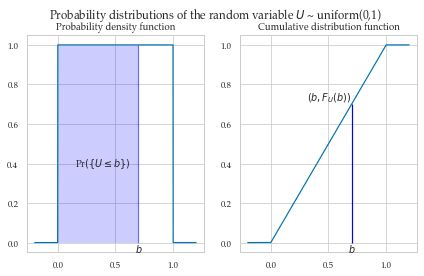

In [5]:
from scipy.stats import uniform
rvU = uniform(0, 1)
_ = plot_pdf_and_cdf(rvU, b=0.7, xlims=[-0.2,1.2], rv_name="U", title="auto")

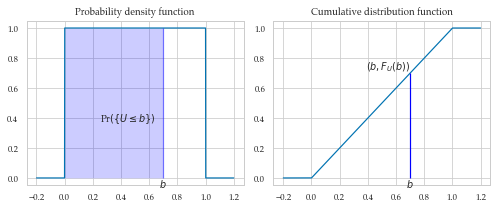

In [81]:
filename = "figures/prob/uniform_pdf_and_CDF_until_b.pdf"

with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvU, b=0.7, xlims=[-0.2,1.2], rv_name="U", title=None)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

**Computer simulation**

We'll introduce computer models for random variables is [Section 2.1.5 — Computer models for random variables](#computer_models) below, but since we're looking at a notebook, we can show a little preview of the calculations you'll learn by the end of the section.

In [7]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
rvU = uniform(0, 1)

# use `quad` function to integrate rvU.pdf between 0.2 and 0.5
from scipy.integrate import quad
quad(rvU.pdf, 0.2, 0.5)[0]

0.3

#### Example 2: Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \Large
    f_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ (the Greek letter *mu*) and the standard deviation $\sigma$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions,
and $N \sim \mathcal{N}(1000, 100)$ is a particular instance of the distribution with mean $\mu = 1000$ and standard deviation $\sigma = 100$.

(<Figure size 504x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Probability density function'}>,
        <AxesSubplot:title={'center':'Cumulative distribution function'}>],
       dtype=object))

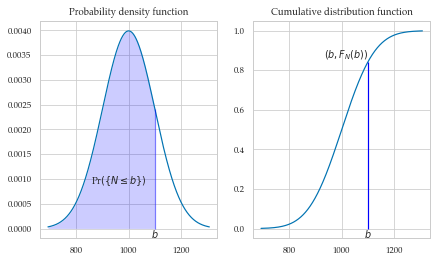

In [8]:
from scipy.stats import norm
mean = 1000
std = 100
rvN = norm(mean, std)

plot_pdf_and_cdf(rvN, b=1100, rv_name="N", title="auto")

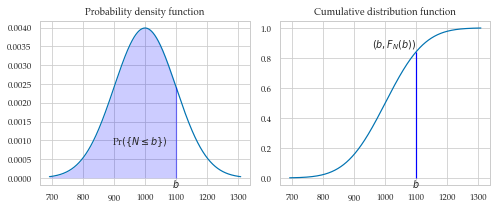

In [82]:
filename = "figures/prob/normal_pdf_and_CDF_until_b.pdf"

from scipy.stats import norm
mean = 1000
std = 100
rvN = norm(mean, std)

with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plot_pdf_and_cdf(rvN, b=1100, rv_name="N", title=None)
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The code example below shows the calculation of the probability $\Pr\!\left( \{ 800 \leq N \leq 900 \} \right)$,
which corresponds to the integral $\int_{n=800}^{n=900} f_N(n) dn$.

In [10]:
# define the computer model `rvN` for the random variable N
from scipy.stats import norm
rvN = norm(1000, 100)

# use `quad` function to integrate rvN.pdf between 800 and 900
quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

#### Example 3: Coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [11]:
# define the computer model `rvC` for the random variable C
from scipy.stats import randint
rvC = randint(0, 2)

# print the values of the probability mass function
for c in range(0,2):
    print(c, rvC.pmf(c))

0 0.5
1 0.5


#### Example 4: Rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [12]:
# define the computer model `rvD` for the random variable D
rvD = randint(1, 7)

# print the values of probability mass function
for d in range(1,7):
    print(d, rvD.pmf(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


## Calculations with random variables

### Example 1: mean and variance of the uniform distribution


#### Mean
\begin{align*}
    \mu_U = \mathbb{E}_U[U] 
        &=	\int_{-\infty}^{\infty}	u f_U(u) \; du		\\
        &=	\int_0^1 u f_U(u) \; du				\\
        &=	\int_0^1 u \cdot 1 \; du	= 	\tfrac{1}{2}.
\end{align*}

In [13]:
from sympy import symbols, integrate

u = symbols('u')
integrate(u * 1, (u,0,1))

1/2

So the mean is $\mu_U = \frac{1}{2} = 0.5$.

#### Variance

The formula for the variance is
$$
    \sigma_U^2
        = \mathbb{E}_U\!\left[ (U-\mu_U)^2 \right]
        = \int_0^1 (u- \tfrac{1}{2})^2 \cdot f_U(u) \; du.
$$

In [14]:
from sympy import symbols, integrate

u = symbols('u')
integrate( (u-1/2)**2 * 1, (u,0,1) )

0.0833333333333333

So the variance of $U$ is $\sigma_U^2 = \frac{1}{12} = 0.08\overline{3}$.

We can compute the standard deviation $\sigma_U$ by taking the square root of the variance.

In [15]:
import numpy as np
np.sqrt(0.0833333333333333)

0.2886751345948128

### Example 2: mean and variance of a normal distribution

$$
    p_N(n)
      = \tfrac{1}{\sigma\sqrt{2\pi}} e^{-\tfrac{(n-\mu)^2}{2\sigma^2}}
      = \tfrac{1}{100\sqrt{2\pi}} e^{-\tfrac{(n-1000)^2}{2\cdot100^2}}.
$$

In [16]:
import numpy as np

mu = 1000
sigma = 100

def fN(n):
    z = (n - mu)/sigma
    C = sigma * np.sqrt(2*np.pi)
    return 1 / C * np.exp(-1/2 * z**2)

The mean of $N$ is

In [17]:
from scipy.integrate import quad

def n_times_fN(n):
    return n * fN(n)

muN = quad(n_times_fN, -2000, 4000)[0]
muN

1000.0

The standard deviation of $N$ is

In [18]:
def n_minus_mu_sq_times_fN(n):
    return (n-muN)**2 * fN(n)

sigma_sq = quad(n_minus_mu_sq_times_fN, -2000, 4000)[0]
sigmaN = np.sqrt(sigma_sq)
sigmaN

100.00000000000001

## Probability models

In probability theory, we model data as instances of a **random variable** $X$ described by a **probability distribution** $f_X$ (a math function) with particular parameters (usually denoted with Greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function). Math models allow us the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for an entire population (census)
- sample data from a population
- synthetic data obtained by resampling
  - bootstrap estimation for any distribution
  - permutation test for no-difference-between-groups hypotheses

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [19]:
from scipy.stats import norm

# create a normal random variable with mean 1000 and std 100
rvN = norm(1000, 100)

In [20]:
type(rvN)

scipy.stats._distn_infrastructure.rv_frozen

In [21]:
## see all attributes and methods:
# [attr for attr in dir(rvN) if "__" not in attr] 

### Plotting the probability functions

<AxesSubplot:>

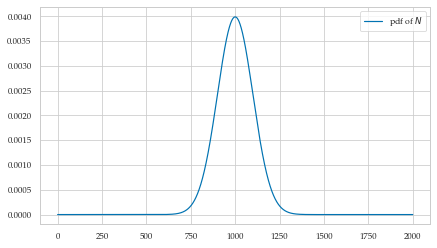

In [22]:
ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="pdf of $N$")

In [23]:
# import matplotlib.pyplot as plt
# filename = "figures/plot_of_pdf_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     ns = np.linspace(0, 2000, 10000)
#     fNs = rvN.pdf(ns)
#     ax = sns.lineplot(x=ns, y=fNs, label="pdf of $N$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The cumulative distribution is the integral of the probability density function:
$$
   F_N(b) = \textrm{Pr}(N \leq b) = \int_{-\infty}^b f_N(n) \, dn
$$


<AxesSubplot:>

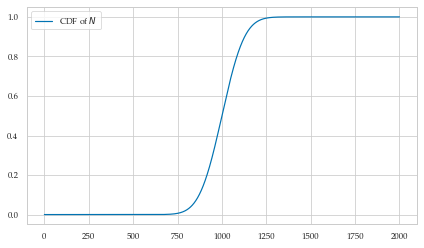

In [24]:
ns = np.linspace(0, 2000, 10000)
FNs = rvN.cdf(ns)
sns.lineplot(x=ns, y=FNs, label="CDF of $N$")

In [25]:
# import matplotlib.pyplot as plt
# filename = "figures/plot_of_CDF_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     ns = np.linspace(0, 2000, 10000)
#     FNs = rvN.cdf(ns)
#     ax = sns.lineplot(x=ns, y=FNs, label="CDF of $N$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Properties of the distribution

In [26]:
rvN.mean()

1000.0

In [27]:
rvN.std()

100.0

In [28]:
rvN.var()

10000.0

In [29]:
np.sqrt( rvN.var() )  # = rvN.std()

100.0

In [30]:
rvN.median()

1000.0

In [31]:
rvN.support()

(-inf, inf)

### Computing probabilities

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $N$.

In [32]:
# Pr({800 < N < 1200}) = integral of f_N between 800 and 1200
quad(rvN.pdf, 800, 1200)[0]

0.9544997361036417

In [33]:
# Pr({800 < N < 1200}) = F_N(1200) - F_N(800)
rvN.cdf(1200) - rvN.cdf(800)

0.9544997361036416

### Computing quantiles

The inverse question is to find the interval $(-\infty, n_q]$ that contains proportion $q$ of the total probability.

For example the $q=0.25$ quantile is located at

In [34]:
# first quartile
rvN.ppf(0.25)

932.5510249803918

In [35]:
# verify that Pr({N<=932.5510249803918)}) == 0.25
rvN.cdf(932.5510249803918)

0.25

In [36]:
# second quartile == median
rvN.ppf(0.5)

1000.0

In [37]:
# third quartile
rvN.ppf(0.75)

1067.4489750196083

#### Left tail

In [38]:
rvN.ppf(0.05)

835.5146373048527

#### Right tail

In [39]:
rvN.ppf(0.95)

1164.4853626951472

#### Computing confidence intervals

To compute a 90% confidence interval for the random variable $N$,
we can use the `rvN.interval()` method.

In [40]:
rvN.interval(0.90)

(835.5146373048527, 1164.4853626951472)

Note the method `rvN.interval(0.90)` is just a shortcut for computing `(rvN.ppf(0.05),rvN.ppf(0.95))`.

### Generating random observations

Let's say you want to generate $n=10$ observations from the random variable $N$.
You can do this by calling the method `rvN.rvs(n)`.

In [41]:
ns = rvN.rvs(10)
ns

array([1178.86284734, 1043.65098505, 1009.64974681,  813.65072966,
        972.26117975,  964.52410207,  991.72585185,  937.29993232,
        995.6181831 ,  952.27819696])

In [42]:
ns_mean = sum(ns) / len(ns)
ns_mean

985.9521754922469

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [43]:
def payment(n):
    if 800 <= n and n <= 1200:
        return 2
    else:
        return 0

In [44]:
# get paid if in spec
payment(1050)

2

In [45]:
# don't get paid if out of spec
payment(1250)

0

In [46]:
# expected value of payment
rvN.expect(payment, lb=0, ub=2000)

1.9089994722069916

Visually speaking, only parts of the probability mass of the random variable "count" towards the payment, the subset of the values inside the yellow region shown below.

<AxesSubplot:>

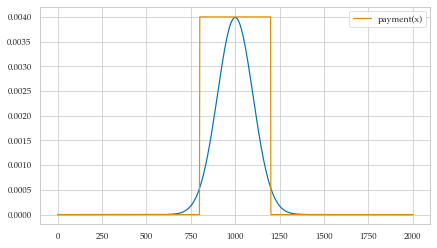

In [47]:
xs = np.linspace(0, 2000, 1000)
ys = [payment(x)/500 for x in xs]

sns.lineplot(x=xs, y=rvN.pdf(xs))
sns.lineplot(x=xs, y=ys, label="payment(x)")

## Discussion

### Theoretical calculus topics




In [48]:
from sympy import symbols

x, a, b, i, m, n = symbols("x a b i m n")
x

x

Let's create a simple expression using the symbols.

In [49]:
expr = b + m*x
expr

b + m*x

Let's look how SymPy represents this expression under the hood.

In [50]:
from sympy import srepr

srepr(expr)

"Add(Symbol('b'), Mul(Symbol('m'), Symbol('x')))"

#### Limits


In [51]:
from sympy import limit, exp, oo

limit(exp(x)/x**100, x, oo) 

oo

In [52]:
# # EXAMPLE 2: ... consider segtment of length (b-a) cut into n parts
# delta = (b - a)/n

# zero length...
# limit(delta, n, oo)

# but still add up to whole interval...
# summation(delta, (i, 0, n-1))

#### Derivatives


The derivative function of $f(x) = mx +b$ is $f'(x)=m$.

In [53]:
from sympy import diff

f = b + m*x

diff(f, x)

m

The derivative function of $f(x) = \frac{c}{2}x^2$ is $f'(x)=cx$.

In [54]:
f = c/2 * x**2

diff(f, x)

1.0*x

Here is another example of a complicated-looking function,
that includes an exponential, a trigonometric, and a logarithmic function.

In [55]:
from sympy import log, exp, sin
f = exp(x) + sin(x) + log(x)
f

exp(x) + log(x) + sin(x)

In [56]:
diff(f)

exp(x) + cos(x) + 1/x

#### Optimization algorithms

See [wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) for the description of the gradient descent algorithm.

The code below implements a simplified version in one dimension, so we call it derivative descent.

In [57]:
def derivative_descent(f, x0=0, alpha=0.01, tol=1e-11):
    """
    Computes the minimum of SymPy expression `f` using
    the gradient descent algorithm in one dimension.
    """
    x_i = x0
    delta = float("inf")
    while delta > tol:
        # print('current', x_i, delta)
        df_at_x_i = diff(f, x).subs({x:x_i})
        x_next = x_i - alpha*df_at_x_i
        delta = abs(x_next - x_i)
        x_i = x_next
    return x_i

Let's find the minimum value of the function $f(x) = (x-5)^2$ using the `derivative_descent` algorithm.

In [58]:
f = (x-5)**2

argmin_f = derivative_descent(f)
argmin_f

4.99999999951256

The solution is roughly accurate to roughly `tol`*10 = `1e-10`  decimals.

In [59]:
float(argmin_f - 5)

-4.874394221587863e-10

#### Using SciPy optimization functions

Let's solve the same optimization problem using the function `minimize` from `scipy.optimize`.

In [60]:
from scipy.optimize import minimize

def f(x):
    return (x-5)**2

res = minimize(f, x0=0)

res["x"][0]  # = argmin f(x)

4.99999997455944

#### Riemann sums

See this [excerpt](https://minireference.com/static/excerpts/noBSmathphys_v5_preview.pdf#page=114) for a definition of the Riemann sum.

#### Fundamental theorem of calculus


In [61]:
from sympy import diff, integrate, log, exp, sin

f = log(x) + exp(x) + sin(x)

In [62]:
F = integrate(f)
F

x*log(x) - x + exp(x) - cos(x)

In [63]:
diff(F)

exp(x) + log(x) + sin(x)

In [64]:
diff(integrate(f)) == f

True

In [65]:
integrate(diff(f)) == f

True

### Bulk of the normal distribution

How much of the total probability "weight" lies within $k$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_N - k\sigma_N \leq N \leq \mu_N + k\sigma_N) \ = \ p_k.
$$

In [66]:
from scipy.integrate import quad
from scipy.stats import norm
rvN = norm(1000, 100)

In [67]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    I_k = [mu - k*sigma, mu + k*sigma]
    p_k = quad(rvN.pdf, *I_k)[0]
    print(f"p_{k} = Pr( N in {I_k} ) = {p_k:.3f}")

p_1 = Pr( N in [900.0, 1100.0] ) = 0.683
p_2 = Pr( N in [800.0, 1200.0] ) = 0.954
p_3 = Pr( N in [700.0, 1300.0] ) = 0.997


The code below highlights the interval $I_k$ and computes the probability $p_k$.
Change the value of $k$ to get different plots.

n = 1 interval contains 0.6826894921370859
n = 2 interval contains 0.9544997361036417
n = 3 interval contains 0.99730020393674


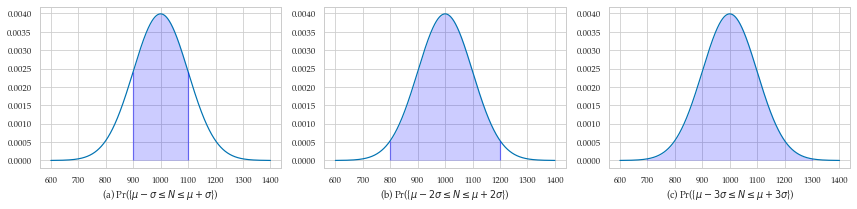

In [68]:
import matplotlib.pyplot as plt
from plot_helpers import calc_prob_and_plot

filename = "figures/bulk_of_the_distribution_panel.pdf"

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    bulk_interval1 = [mu-n*sigma, mu+n*sigma]
    p1, ax1 = calc_prob_and_plot(rvN, *bulk_interval1, xlims=[600, 1400], ax=ax1,
                                 title="(a) Pr({$\mu-\sigma \leq N \leq \mu+\sigma$})")
    print("n =", n, "interval contains", p1)

    n = 2
    bulk_interval2 = [mu-n*sigma, mu+n*sigma]
    p2, ax2 = calc_prob_and_plot(rvN, *bulk_interval2, xlims=[600, 1400], ax=ax2,
                                 title="(b) Pr({$\mu-2\sigma \leq N \leq \mu+2\sigma$})")
    print("n =", n, "interval contains", p2)

    n = 3
    bulk_interval3 = [mu-n*sigma, mu+n*sigma]
    p3, ax2 = calc_prob_and_plot(rvN, *bulk_interval3, xlims=[600, 1400], ax=ax3,
                                 title="(c) Pr({$\mu-3\sigma \leq N \leq \mu+3\sigma$})")
    print("n =", n, "interval contains", p3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [69]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-k𝜎]
    x_l = mu - k*sigma
    p_l = quad(rvN.pdf, rvN.ppf(0.0000000001), x_l)[0]
    # compute the probability in the right tail [𝜇+k𝜎,∞)
    x_r = mu + k*sigma
    p_r = quad(rvN.pdf, x_r, rvN.ppf(0.9999999999))[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr( N<{x_l} or N>{x_r} ) = {p_tails:.4f}")

Pr( N<900.0 or N>1100.0 ) = 0.3173
Pr( N<800.0 or N>1200.0 ) = 0.0455
Pr( N<700.0 or N>1300.0 ) = 0.0027


The code below highlights the tails of the distribution and computes the sum of their probability.

p1=0.6826894921370859
p2=0.04550026389615838
p3=0.002699796063060157



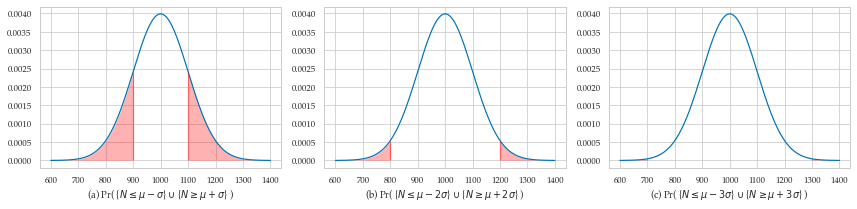

In [70]:
filename = "figures/tails_of_the_distribution_panel.pdf"

from plot_helpers import calc_prob_and_plot_tails


mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title1 = "(a) Pr( {$N \leq \mu-\sigma$} $\cup$ {$N \geq \mu+\sigma$} )"
    p2, ax1 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax1, title=title1)

    n = 2
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title2 = "(b) Pr( {$N \leq \mu-2\sigma$} $\cup$ {$N \geq \mu+2\sigma$} )"
    p2, ax2 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax2, title=title2)

    n = 3
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title3 = "(c) Pr( {$N \leq \mu-3\sigma$} $\cup$ {$N \geq \mu+3\sigma$} )"
    p3, ax3 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax3, title=title3)

    print(f"{p1=}\n",f"{p2=}\n",f"{p3=}\n", sep="")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $k=2$ standard deviations away from the mean (more precisely, we should use $k=1.96$ to get exactly 5%). We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.

# FIGURES GEN

# CUT MATERIAL

#### CUT EXAMPLE PLOT OF PDF (used to be in Calculus section)

<AxesSubplot:>

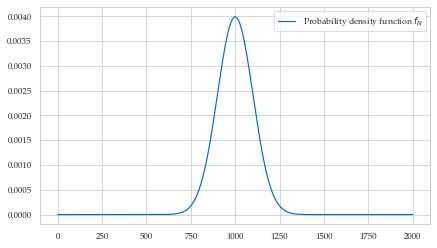

In [71]:
from scipy.stats import norm

# define normally distributed random variable with 𝜇=1000 and 𝜎=100
rvN = norm(1000, 100)

ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="Probability density function $f_N$")

In [72]:
# import matplotlib.pyplot as plt
# filename = "figures/graph_of_pdf_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     x = np.linspace(0, 2000, 10000)
#     fN = rvN.pdf(x)
#     ax = sns.lineplot(x=x, y=fN)
#     ax.figure.tight_layout()
#     ax.set_title("Probability density function for the distribution $\mathcal{N}(1000,100)$")
#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$f_N(x)$')
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)